# Wine Quality Prediction

## Dataset Description

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). The task is to predict the quality of wine using the given data.

It has 13 colomns explaind below are based on physicochemical tests.

## Columns

1. **fixed acidity**: Acids that do not evaporate easily / Acidi che non evaporano facilmente
2. **volatile acidity**: Acids that evaporate quickly and can give a vinegar-like smell / Acidi che evaporano velocemente e possono dare un odore simile all'aceto
3. **citric acid**: A weak acid found in citrus fruits, adding freshness / Un acido debole presente negli agrumi, che aggiunge freschezza
4. **residual sugar**: Sugar left after fermentation, giving sweetness / Zucchero rimasto dopo la fermentazione, che conferisce dolcezza
5. **chlorides**: Salt compounds that can affect the wine's taste and mouthfeel / Composti di sale che possono influenzare il sapore e la consistenza del vino
6. **free sulfur dioxide**: Preservative that protects wine from oxidation / Conservante che protegge il vino dall'ossidazione
7. **total sulfur dioxide**: The total amount of sulfur compounds, both free and bound / La quantità totale di composti di zolfo, sia liberi che legati
8. **density**: The mass of wine per unit volume, related to alcohol and sugar content / La massa del vino per unità di volume, legata al contenuto di alcol e zucchero
9. **pH**: Measure of acidity or alkalinity, affecting freshness and stability / Misura dell'acidità o alcalinità, che influisce sulla freschezza e stabilità
10. **sulphates**: Compounds that can enhance the preservation and stability of the wine / Composti che possono migliorare la conservazione e la stabilità del vino
11. **alcohol**: The ethanol content in the wine, influencing body and flavor / Il contenuto di etanolo nel vino, che influenza corpo e sapore
12. **quality**: The overall assessment of the wine's characteristics and balance / La valutazione complessiva delle caratteristiche e dell'equilibrio del vino
13. **id**: A unique identifier for tracking the wine / Un identificatore univoco per tracciare il vino

## Objective
- Understand the Dataset & cleanup (if required).
- Build classification models to predict the wine quality.
- Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

## Licence
CC0: Public Domain

## Update Frequency
Annually (Updated 3 years ago)

# Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Load the raw file from my repo

DATA_URL = "https://raw.githubusercontent.com/elvisperlika/Wine-Quality-Prediction/main/WineQT.csv"

import os.path
if not os.path.exists("wine.csv"):
    from urllib.request import urlretrieve
    urlretrieve(DATA_URL, "wine.csv")

In [5]:
data = pd.read_csv('wine.csv')

In [6]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [7]:
# remove the useless column: Id
data = data.drop('Id', axis=1)

In [8]:
# medie su tutti i vini
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Analyzing the above data, it's possible to note that there are not missing data.


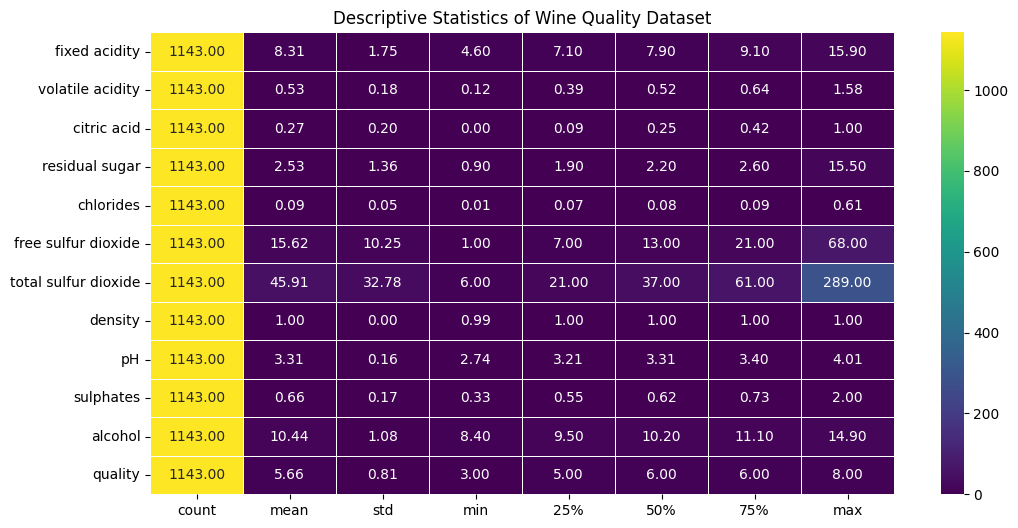

In [9]:
# plot of the describe
desc = data.describe()
plt.figure(figsize=(12, 6))
sns.heatmap(desc.T, annot=True, fmt=".2f", cmap="viridis", linewidths=.5)
plt.title("Descriptive Statistics of Wine Quality Dataset")
plt.show()


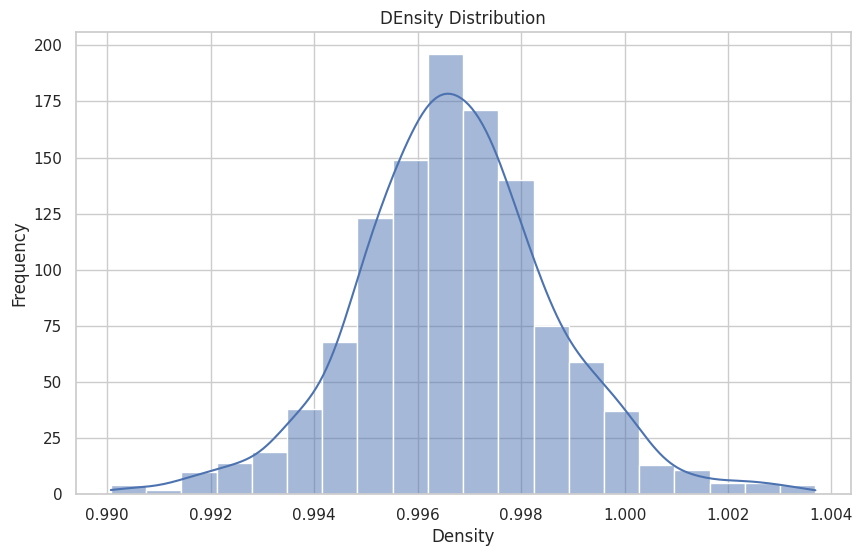

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data["density"], bins=20, kde=True)
plt.title("DEnsity Distribution")
plt.xlabel("Density")
plt.ylabel("Frequency")
plt.show()

**DA TRADURRE**

Il seguente schema ci mostra come la densità dei vini presenti nel dataset rispetti una distribuzione gaussiana, ci si chiede pertanto se possa esserci una relazione con la qualità se il numero di vini con queste caratteristiche è così elevato tra i valori 0.996 e 0.998 .

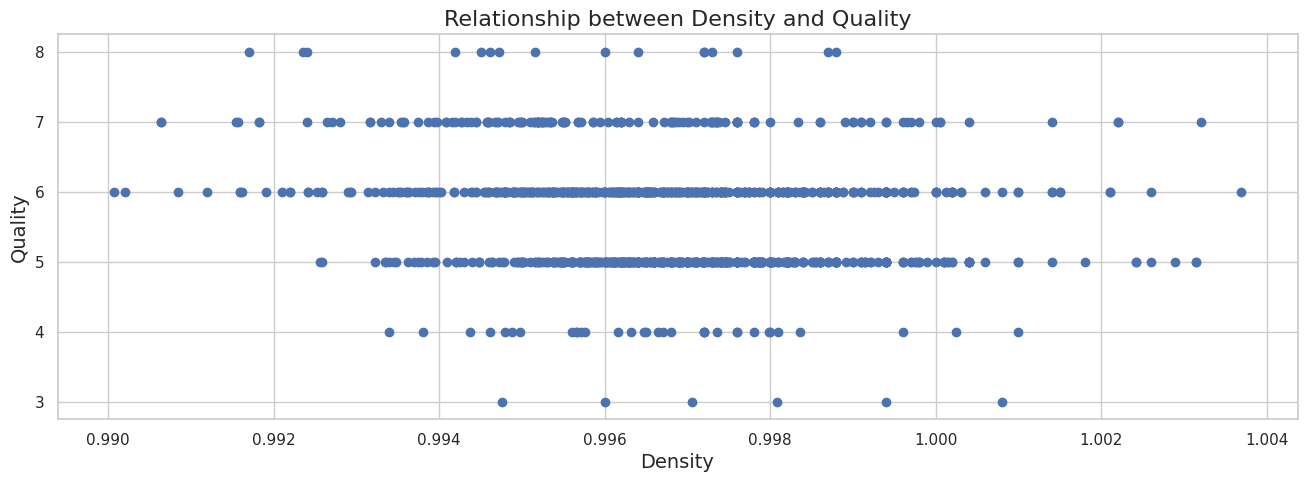

In [52]:
plt.figure(figsize=(16, 5))
plt.scatter(
    data['density'],
    data['quality'],
)
plt.title("Relationship between Density and Quality", fontsize=16)
plt.xlabel("Density", fontsize=14)
plt.ylabel("Quality", fontsize=14)
plt.show()

DA TRADURRE

È abbastanza chiara la relazione tra Densità e Qualità ma andremo ad analizzarne più nel dettaglio la relazione che intercorre tra i 2 valori.

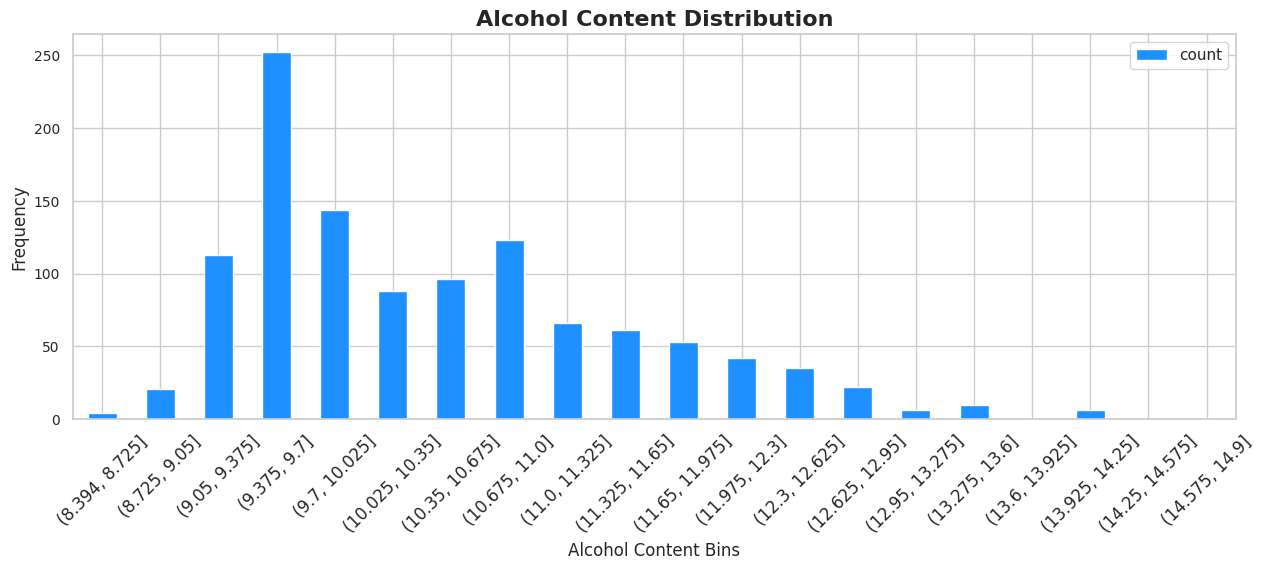

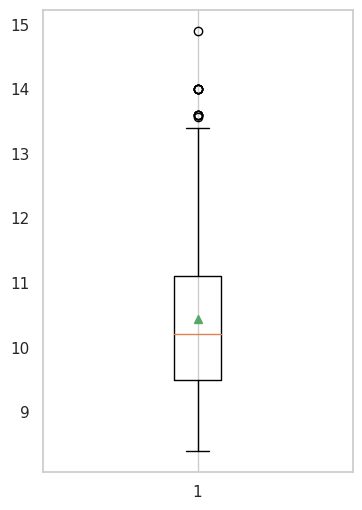

In [38]:
bar_data = pd.cut(data["alcohol"], bins=20).value_counts().sort_index()

# Creazione del grafico a barre
ax = bar_data.plot.bar(color="dodgerblue", figsize=(15, 5))

# Miglioramenti grafici
plt.title("Alcohol Content Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Alcohol Content Bins", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()  # Aggiungo la legenda

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=10)

plt.show()


plt.figure(figsize=(4, 6))
plt.boxplot(data["alcohol"], showmeans=True)
plt.grid(axis="y");